What is gather here:
 - Dashboards --
 - Histogram
 - Box & Violin
 - Scatterplot & Bubble
 - Bar & Line & Area & Pie Chart
 - Dual Axis & Secondary Axes --
 - Waterfall & Bullet & Funnel Chart --
 - Heat Map & Treemap/Mekko Chart --

using packages Plots.jl and Gadfly.jl (dont need to show how to install the packages), how to plot a histogram, scatter, bubble, box plot, violin plot
put all the parameters with the default value in the command; for each plot only return the command of creation with the parameters (maybe add data creation
in the end, for each package, put the description for all parameters (dont need to separete them by plots, only list them all (no duplicates

In [2]:
using DataFrames
using Plots
using Gadfly
using StatsPlots

In [3]:
# Create data

aq = [10.0   8.04  10.0  9.14  10.0   7.46   1900   6.58   'A'   'Z'
       8.0   6.95   8.0  8.14   8.0   6.77   1970   5.76   'B'   'X'
      13.0   7.58  13.0  8.74  13.0  12.74   1980   7.71   'A'   'Y'
       9.0   8.81   9.0  8.77   9.0   7.11   1981   8.84   'A'   'X'
      11.0   8.33  11.0  9.26  11.0   7.81   1982   8.47   'B'   'X'
      14.0   9.96  14.0  8.1   14.0   8.84   1983   7.04   'B'   'Z'
       6.0   7.24   6.0  6.13   6.0   6.08   1984   5.25   'A'   'Y'
       4.0   4.26   4.0  3.1    4.0   5.39   1985  missing 'B'   'X'
      12.0  10.84  12.0  9.13  12.0  missing 1990   5.56   'B'   'Z'
       7.0   4.82   7.0  7.26   7.0   6.42   1998   7.91   'B'   'X'
       5.0   5.68   5.0  4.74   5.0   5.73   1999   6.89   'A'   'Y']

df = DataFrame(aq, :auto)

data_x1 = df[!,:x1]
data_x7 = df[!,:x7];

In [ ]:
#Theme(default_color="blue") #allows customization of color, opacity, and other aesthetic elements

# Histograms

#### Plots.jl

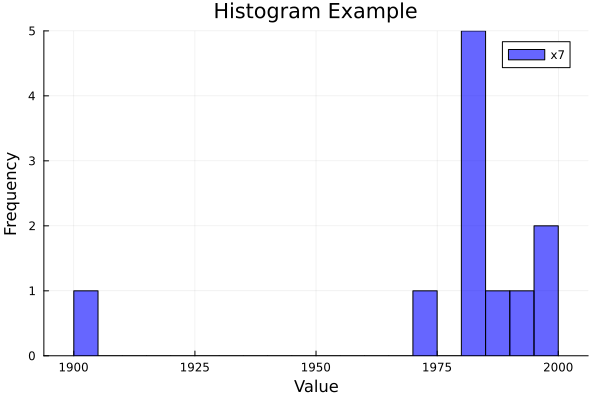

In [ ]:
histogram(data_x7, bins = 20, xlabel = "Value", ylabel = "Frequency", title = "Histogram Example",
          normalize = false, #normalizie bar heights - also, :density or :probability or :pdf
          fillalpha = 0.6, #bar transparency - 0 is transparant, 1 is opaque
          linecolor = :black, fillcolor=:blue, #color of the lines and the bars
          legend = :topright, #legend position - also, :topleft, :downright, :outertop, false
          label = "x7" #label of the data series of the legend
          )

#### Gadfly.jl

┌ Warning: binwidth is not a recognized aesthetic. Ignoring.
└ @ Gadfly /home/salomon/.julia/packages/Gadfly/OQ068/src/mapping.jl:63
┌ Warning: bincount is not a recognized aesthetic. Ignoring.
└ @ Gadfly /home/salomon/.julia/packages/Gadfly/OQ068/src/mapping.jl:63
┌ Warning: The following aesthetics are mapped, but not used by any geometry:
│ label
└ @ Gadfly /home/salomon/.julia/packages/Gadfly/OQ068/src/Gadfly.jl:503
┌ Warning: The following aesthetics are mapped, but not used by any geometry:
│ label
└ @ Gadfly /home/salomon/.julia/packages/Gadfly/OQ068/src/Gadfly.jl:503


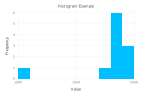

In [ ]:
Gadfly.plot(df, x=:x7, Geom.histogram(bincount = 10, density = false), 
     bincount = 20, binwidth = 0.5, #numb of bins and its widht
     Guide.xlabel("Value"), Guide.ylabel("Frequency"), Guide.title("Histogram Example")
     #Theme(default_color="blue") #allows customization of color, opacity, and other aesthetic elements
     )

# Scatter & Bubble

#### Plots.jl

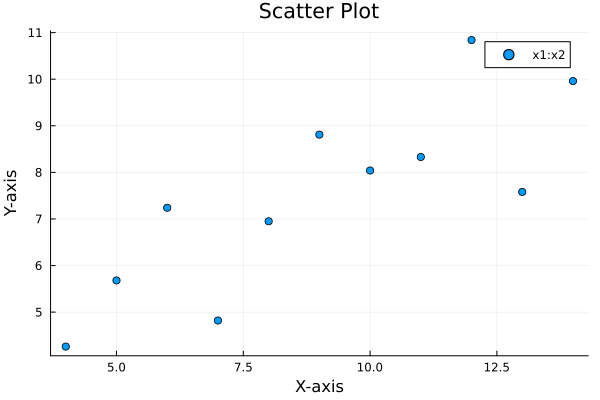

In [ ]:
scatter(df.x1, df.x2, marker = :circle, #mark shape used - also, :rect, :cross, df.x3 (for bubble plot)
    legend = :topright, #legend position - also, :topleft, :downright, :outertop, false
    xlabel = "X-axis", ylabel = "Y-axis", title = "Scatter Plot", label = "x1:x2")

#### Gadfly.jl

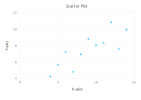

In [37]:
Gadfly.plot(df, x = :x1, y = :x2, Geom.point, #Gadfly.Shape.circle, #mark shape used - also, :Shape.square, :Shape.Cross
    #size = :x3, #optional parameter, only used in bubble plots (size of the bubble)
    Guide.xlabel("X-axis"), Guide.ylabel("Y-axis"), Guide.title("Scatter Plot"))


# Boxplot & Violin

#### Plots.jl

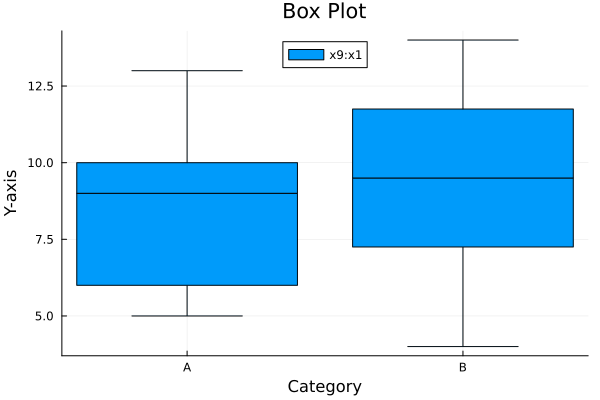

In [19]:
boxplot(df.x9, df.x1, legend = :top, xlabel = "Category", ylabel = "Y-axis", title = "Box Plot", label = "x9:x1")
  #violin(df.x9, df.x1, legend = :top, xlabel = "Category", ylabel = "Y-axis", title = "Violin Plot", label = "x9:x1")

#### Gadfly.jl

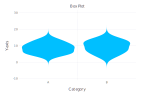

In [ ]:
Gadfly.plot(df, x = :x9, y = :x1, Geom.boxplot, #Geom.violin for violin plot
    Guide.xlabel("Category"), Guide.ylabel("Y-axis"), Guide.title("Box Plot"))

# Bar

#### Plots.jl

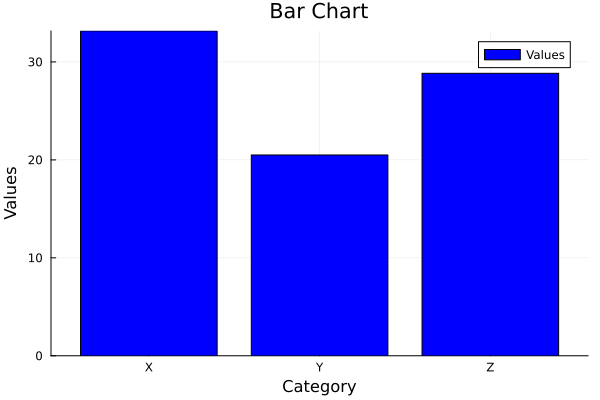

In [18]:
gb = groupby(df, :x10, sort=true)
df_temp = combine(gb, :x2 => sum => :x2sum)
bar(df_temp.x10, df_temp.x2sum; color = :blue, label = "Values", #label of the data series of the legend
    title = "Bar Chart", xlabel = "Category", ylabel = "Values", bar_width = 0.8)

#### Gadfly.jl

In [20]:
Gadfly.plot(df, x = :x10, y = :x2, Geom.bar, Guide.title("Bar Chart"), Guide.xlabel("Category"), Guide.ylabel("Values"))

Plot(...)

# Line

#### Plots.jl

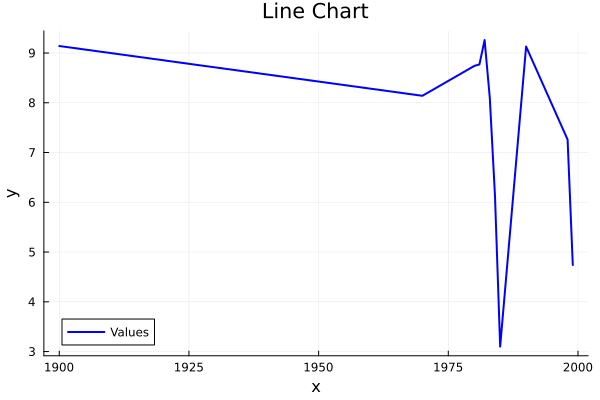

In [10]:
StatsPlots.plot(df.x7, df.x4; color = :blue, label = "Values", title = "Line Chart", xlabel = "x", ylabel = "y", 
    line = :solid, linewidth = 2)

#### Gadfly.jl

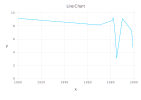

In [11]:
Gadfly.plot(df, x = :x7, y = :x4, Geom.line, Guide.title("Line Chart"), Guide.xlabel("x"), Guide.ylabel("y"))


# Area

#### Plots.jl

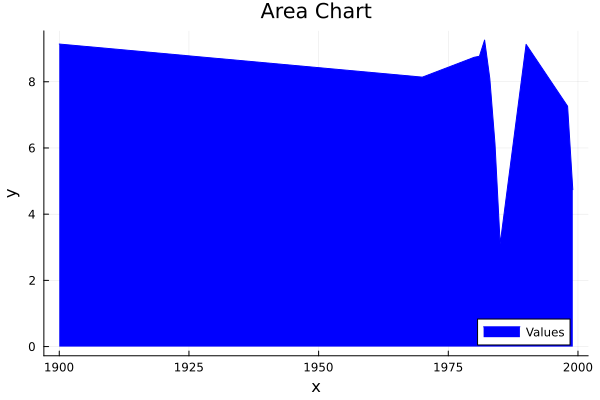

In [13]:
StatsPlots.plot(df.x7, df.x4; color = :blue, label = "Values", title = "Area Chart", xlabel = "x", ylabel = "y", fillrange = 0)

#### Gadfly.jl

In [14]:
Gadfly.plot(df, x = :x7, y = :x4, Geom.line, Geom.ribbon, Guide.title("Area Chart"), Guide.xlabel("x"), Guide.ylabel("y"))


Plot(...)

# Pie

#### Plots.jl

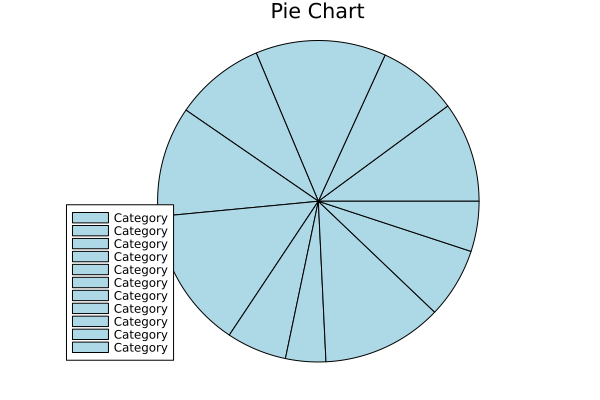

In [18]:
pie(df.x10, df.x1; label = "Category", title = "Pie Chart", color = :blues)

# others

#### Plots.jl

#### Gadfly.jl